In [94]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.model_selection import train_test_split

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils.np_utils import to_categorical

In [96]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [97]:
y_train = to_categorical(y_train)

In [98]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train = X_train.reshape(-1,28,28,1)

input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])

output_shape = y_train.shape

In [22]:
network = Sequential()
network.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
network.add(MaxPool2D((2,2)))
network.add(Conv2D(64,(3,3),activation='elu'))
network.add(MaxPool2D((2,2)))
network.add(Conv2D(64,(3,3),activation='elu'))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(10,activation='softmax'))

In [23]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [30]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2)

In [31]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metric = ['accuracy']

network.compile(optimizer=optimizer,loss=loss, metrics=metric)

In [32]:
epoch = 30
batch_size = 400

network.fit(X_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=[X_val,y_val])

Epoch 1/30
120/120 [==============================] - 19s 154ms/step - loss: 0.0594 - accuracy: 0.9825 - val_loss: 0.0507 - val_accuracy: 0.9837
Epoch 2/30
120/120 [==============================] - 18s 148ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 3/30
120/120 [==============================] - 18s 150ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0551 - val_accuracy: 0.9857
Epoch 4/30
120/120 [==============================] - 18s 148ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0485 - val_accuracy: 0.9877
Epoch 5/30
120/120 [==============================] - 18s 154ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.0481 - val_accuracy: 0.9888
Epoch 6/30
120/120 [==============================] - 17s 145ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0478 - val_accuracy: 0.9896
Epoch 7/30
120/120 [==============================] - 17s 143ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0561 - val_ac

In [33]:
X_test = X_test.reshape(-1,28,28,3)
y_test = to_categorical(y_test)

In [35]:
network.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0777 - accuracy: 0.9867


[0.07766931504011154, 0.9866999983787537]

In [41]:
X_test.shape[0] *  (1- network.evaluate(X_test,y_test)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9867


133.00001621246338

In [37]:
wrong_predict = np.argmax(y_test,axis=1) != np.argmax(network.predict(X_test),axis=1)

In [57]:
x = X_test[wrong_predict]
y = np.argmax(network.predict(x),axis=1)
t = y_test[wrong_predict]

In [58]:
x.shape

(133, 28, 28, 1)

In [59]:
t = np.argmax(t,axis=1)

예측값 [6 4 7 3 8 7 8 5 2 2 7 1 8 0 9 5 1 8 8 7 9 2 4 5 1 7 2 3 7 3 3 7 5 7 3 3 8
 8 8 8 3 9 0 8 9 1 8 8 8 8 4 0 3 1 5 2 7 5 6 8 8 9 0 2 8 0 8 1 2 8 8 6 0 4
 1 8 7 9 7 8 8 4 9 0 7 8 4 4 4 4 0 6 8 8 3 8 8 9 9 0 9 8 5 8 8 1 7 2 4 8 2
 5 2 6 5 9 2 2 2 2 4 8 4 7 7 1 6 6 0 8 8 8 7] 실제값 [4 9 2 5 9 3 9 3 7 8 2 2 9 2 8 6 7 6 9 3 7 7 9 9 7 5 8 5 9 2 7 8 3 3 9 5 2
 9 7 1 5 7 2 9 4 6 9 5 9 0 9 2 5 6 6 3 9 3 0 6 3 7 6 3 4 5 2 6 7 7 5 4 8 9
 7 9 2 7 1 2 2 9 3 1 2 6 8 9 6 9 9 0 2 2 5 3 3 5 5 2 5 9 9 9 9 7 0 8 6 3 3
 3 7 0 8 4 7 7 7 7 9 9 9 9 9 6 5 5 5 2 2 2 3]
예측값 [6 4 7 3 8 7 8 5 2 2 7 1 8 0 9 5 1 8 8 7 9 2 4 5 1 7 2 3 7 3 3 7 5 7 3 3 8
 8 8 8 3 9 0 8 9 1 8 8 8 8 4 0 3 1 5 2 7 5 6 8 8 9 0 2 8 0 8 1 2 8 8 6 0 4
 1 8 7 9 7 8 8 4 9 0 7 8 4 4 4 4 0 6 8 8 3 8 8 9 9 0 9 8 5 8 8 1 7 2 4 8 2
 5 2 6 5 9 2 2 2 2 4 8 4 7 7 1 6 6 0 8 8 8 7] 실제값 [4 9 2 5 9 3 9 3 7 8 2 2 9 2 8 6 7 6 9 3 7 7 9 9 7 5 8 5 9 2 7 8 3 3 9 5 2
 9 7 1 5 7 2 9 4 6 9 5 9 0 9 2 5 6 6 3 9 3 0 6 3 7 6 3 4 5 2 6 7 7 5 4 8 9
 7 9 2 7 1 2 2 9 3 1 

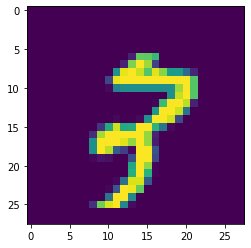

In [56]:
for i in range(x.shape[0]):
    print(f'예측값 {y} 실제값 {t}')
    plt.imshow(x[i].reshape(28,28))

In [122]:
from keras.datasets import cifar10


In [123]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [124]:
X_train.shape

(50000, 32, 32, 3)

In [125]:
y_train = to_categorical(y_train)

In [126]:
X_train = X_train.reshape(-1,32,32,3)

input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])

output_shape = y_train.shape[1]

In [127]:
X_train.shape
output_shape

10

In [128]:
network = Sequential()
network.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
network.add(MaxPool2D((2,2)))
network.add(Conv2D(64,(3,3),activation='elu'))
network.add(MaxPool2D((2,2)))
network.add(Conv2D(64,(3,3),activation='elu'))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(output_shape,activation='softmax'))

In [129]:
network.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 1024)            

In [130]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2)

optimizer = 'adam'
loss = 'categorical_crossentropy'
metric = ['accuracy']


network.compile(optimizer=optimizer,loss=loss, metrics=metric)

In [131]:
epoch = 30
batch_size = 400

network.fit(X_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=[X_val,y_val])

2022-05-04 17:29:42.316818: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


Epoch 1/30
100/100 [==============================] - 23s 221ms/step - loss: 4.0059 - accuracy: 0.2248 - val_loss: 1.8289 - val_accuracy: 0.3111
Epoch 2/30
100/100 [==============================] - 21s 215ms/step - loss: 1.6717 - accuracy: 0.3849 - val_loss: 1.5332 - val_accuracy: 0.4399
Epoch 3/30
100/100 [==============================] - 22s 223ms/step - loss: 1.4917 - accuracy: 0.4605 - val_loss: 1.4347 - val_accuracy: 0.4752
Epoch 4/30
100/100 [==============================] - 21s 208ms/step - loss: 1.3804 - accuracy: 0.5009 - val_loss: 1.3338 - val_accuracy: 0.5203
Epoch 5/30
100/100 [==============================] - 21s 209ms/step - loss: 1.2861 - accuracy: 0.5370 - val_loss: 1.2835 - val_accuracy: 0.5310
Epoch 6/30
100/100 [==============================] - 23s 226ms/step - loss: 1.2178 - accuracy: 0.5617 - val_loss: 1.2402 - val_accuracy: 0.5570
Epoch 7/30
100/100 [==============================] - 22s 222ms/step - loss: 1.1576 - accuracy: 0.5881 - val_loss: 1.2010 - val_ac

In [135]:
X_test = X_test.reshape(-1,32,32,3)
y_test = to_categorical(y_test)

In [136]:
network.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5803 - accuracy: 0.6397


[1.580327033996582, 0.6396999955177307]

In [137]:
X_test.shape[0] *  (1- network.evaluate(X_test,y_test)[1])

313/313 [==============================] - 1s 5ms/step - loss: 1.5803 - accuracy: 0.6397


3603.000044822693

In [145]:
wrong_predict = np.argmax(y_test,axis=1) != np.argmax(network.predict(X_test),axis=1)

In [146]:
x = X_test[wrong_predict]
y = np.argmax(network.predict(x),axis=1)
t = y_test[wrong_predict]

In [147]:
t = np.argmax(t,axis=1)

예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5 ... 3 3 1]
예측값 [4 4 6 ... 6 4 4] 실제값 [6 0 5

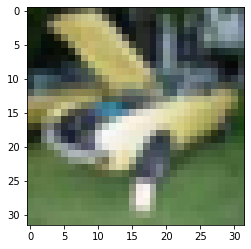

In [149]:
for i in range(x.shape[0]):
    print(f'예측값 {y} 실제값 {t}')
    plt.imshow(x[i].reshape(32,32,3))